>Author:BBSM;
>
>更多内容请关注公众号【宝宝数模AI】

## 一、什么是线性回归？

**线性回归** 是一种基本但极为重要的监督学习算法，广泛用于预测连续数值型数据。其主要目标是通过分析已知数据点之间的关系，找出一个能够用来预测新数据点的函数模型。在最简单的情况下，线性回归尝试找到一条直线，这条直线能够最佳地通过数据点，并最小化预测值与实际值之间的差异。

在线性回归模型中，我们通常假设因变量 $y$ 与自变量 $x$ 之间存在线性关系，这种关系可以用一个简单的数学公式表示为：

$$
y = \beta_0 + \beta_1x + \epsilon
$$

其中：
- $y$ 是因变量（即我们想要预测的值）。
- $x$ 是自变量（即我们用来预测 $y$ 的值）。
- $\beta_0$ 是截距（当 $x = 0$ 时的 $y$ 值）。
- $\beta_1$ 是斜率（表示 $x$ 每增加一个单位时， $y$ 的变化量）。
- $\epsilon$ 是误差项（表示由于模型简化或其他未被观测到的因素所造成的偏差）。

## 二、线性回归的原理

**线性回归的核心思想** 是找到一组最优的模型参数 $\beta_0$ 和 $\beta_1$，使得模型的预测值与实际观测值之间的误差最小。这个过程通常通过最小化“残差平方和”（Sum of Squared Residuals, SSR）来实现。

![](https://files.mdnice.com/user/50822/8f19c2c9-5ddb-4810-8e24-71f803959e75.png)
<center> 图1 1 维和 2 维输入特征的线性模型 </center>

### 2.1 假设模型

首先，我们假设数据中的自变量 $x$ 和因变量 $y$ 之间存在一个线性关系，即：

$$
y_i = \beta_0 + \beta_1x_i + \epsilon_i
$$

其中， $i$ 表示数据点的索引， $\epsilon_i$ 是误差项。

### 2.2 残差和残差平方和

对于每个观测数据点 $i$，模型的预测值 $\hat{y}_i$ 与真实值 $y_i$ 之间的差异被称为 **残差**（Residual），定义为：

$$
\text{残差} = y_i - \hat{y}_i
$$

为了评估模型的整体表现，我们计算所有残差的平方和，这个值被称为 **残差平方和**（Sum of Squared Residuals, SSR）：

$$
SSR = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1x_i))^2
$$

### 2.3 最小二乘法

最小二乘法（Least Squares Method）是一种用来确定最优模型参数 $\beta_0$ 和 $\beta_1$ 的方法。其目标是找到参数值，使得残差平方和 $SSR$ 最小化。为了达到这一目标，我们需要对 $SSR$ 求导并找到其最小值。

首先，对 $\beta_0$ 和 $\beta_1$ 求偏导数：

$$
\frac{\partial SSR}{\partial \beta_0} = -2 \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1x_i)
$$

$$
\frac{\partial SSR}{\partial \beta_1} = -2 \sum_{i=1}^{n} x_i(y_i - \beta_0 - \beta_1x_i)
$$

将这些偏导数设为零，可以得到以下两个方程：

$$
\sum_{i=1}^{n} (y_i - \beta_0 - \beta_1x_i) = 0
$$

$$
\sum_{i=1}^{n} x_i(y_i - \beta_0 - \beta_1x_i) = 0
$$

通过求解这两个方程，我们可以得到最优的 $\beta_0$ 和 $\beta_1$ 值：

$$
\beta_1 = \frac{n \sum_{i=1}^{n} x_i y_i - \sum_{i=1}^{n} x_i \sum_{i=1}^{n} y_i}{n \sum_{i=1}^{n} x_i^2 - (\sum_{i=1}^{n} x_i)^2}
$$

$$
\beta_0 = \frac{1}{n} \sum_{i=1}^{n} y_i - \beta_1 \frac{1}{n} \sum_{i=1}^{n} x_i
$$

这样一来，我们就找到了能够最佳拟合数据点的回归直线，即最优的 $\beta_0$ 和 $\beta_1$ 参数。

### 2.4 模型的评估

在得到模型后，我们需要评估其效果，常用的评估指标包括：
- **决定系数 $R^2$**：衡量模型解释变量 $x$ 对因变量 $y$ 的解释能力，取值范围为 0 到 1，越接近 1 表明模型越好。
- **均方误差（MSE）**：衡量模型预测值与实际值之间的平均误差平方。


### 三、案例分析：房价预测

我们将使用加州房价数据集（California Housing Dataset），这是一个公开的机器学习数据集，包含加利福尼亚州各地区的房屋信息，包括房价、中位数收入、住房年龄等特征。我们将通过房屋面积和中位数收入来预测房价。

![](https://img-blog.csdnimg.cn/img_convert/1c72d41f53484d7857a4b0c19af8bb26.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 设置字体，解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

# 加载加州房价数据集
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


均方误差（MSE）: 0.657451727882265
决定系数（R^2）: 0.49828508595474374


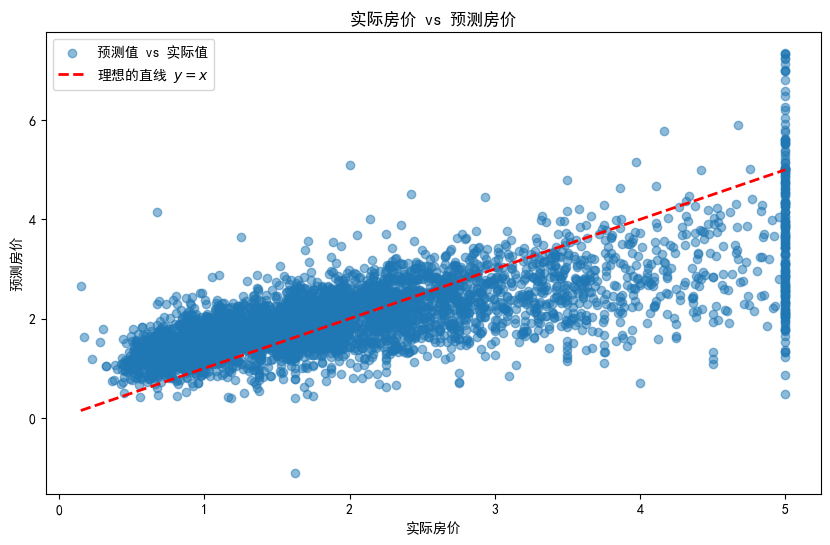

In [2]:

# 选择特征 'MedInc' 进行建模
X = data[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']]
y = data['MedHouseVal']

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 使用测试集进行预测
y_pred = model.predict(X_test)

# 评估模型表现
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"均方误差（MSE）: {mse}")
print(f"决定系数（R^2）: {r2}")

# 可视化预测值与实际值的比较
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="预测值 vs 实际值")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="理想的直线 $y = x$")
plt.xlabel("实际房价")
plt.ylabel("预测房价")
plt.title("实际房价 vs 预测房价")
plt.legend()
plt.show()
